# User parameters

In [ ]:
acc = input("Enter the account number ")
print(acc)

Enter the account number 912
912


In [ ]:
zsco = input("Enter the Zscore val")
print(zsco)

Enter the Zscore val1.96
1.96


In [ ]:
vot = input("Enter the vote parameter")
print(vot)

Enter the vote parameter2
2


# Installs and Imports

In [ ]:
## Installs
!pip install geopy
!pip install kneed
!pip install pyod
!pip install pyodbc

In [ ]:
## Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import geopy
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
from kneed import KneeLocator
from sklearn.cluster import KMeans
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import scale
from pyod.models.lof import LOF
from pyod.models.knn import KNN

# Data Pipeline  *(Whitelisted IP Only)*

In [ ]:
## Do not run unless connected to whitelisted IP

In [ ]:
!curl ipecho.net/plain

24.60.252.118


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    13  100    13    0     0    113      0 --:--:-- --:--:-- --:--:--   113


In [ ]:
## Imports
import pyodbc
from sqlalchemy import create_engine
import urllib
import sqlalchemy as db
import pandas as pd
from sqlalchemy.sql import text
from datetime import datetime

In [ ]:
## Connecting to azure DB
def azure_sql_connection_fetch_data():
    conn_engine = None
    server = 'proj-bu-sql-01.database.windows.net'
    database = 'SAMPLEDB'
    username = 'agohil@bu.edu'
    params = urllib.parse.quote_plus("Driver={ODBC Driver 17 for SQL Server};Encrypt=no;Server=tcp:"+server+";DATABASE="+database+";UID="+username+";Authentication=ActiveDirectoryInteractive")

    try:
        # conn_engine = create_engine('mssql+pyodbc://'+username+':'+password+'@'+server+':1433'+'/'+database+'?driver=ODBC+Driver+17+for+SQL+Server')
        conn_engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
        print(conn_engine)
    except Exception as err:
        print("Failed to connect to azure sql database")
        print(err)
    return conn_engine

conn_engine = azure_sql_connection_fetch_data()
cnxn = conn_engine.connect()

Engine(mssql+pyodbc:///?odbc_connect=Driver%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BEncrypt%3Dno%3BServer%3Dtcp%3Aproj-bu-sql-01.database.windows.net%3BDATABASE%3DSAMPLEDB%3BUID%3Dagohil%40bu.edu%3BAuthentication%3DActiveDirectoryInteractive)


In [ ]:
## Getting AccountPerformanceFactor Data
s = text(
  "SELECT *  "
        "FROM   [dbo].[AccountPerformanceFactors]"
        "where AccountID = :x "
        "and AssetClassID = 8 ")
df_acc = pd.DataFrame(cnxn.execute(s, x=acc).fetchall())
df_acc

Exception during reset or similar
Traceback (most recent call last):
  File "C:\Users\Aash\anaconda3\lib\site-packages\sqlalchemy\pool\base.py", line 670, in _finalize_fairy
    fairy._reset(pool)
  File "C:\Users\Aash\anaconda3\lib\site-packages\sqlalchemy\pool\base.py", line 875, in _reset
    pool._dialect.do_rollback(self)
  File "C:\Users\Aash\anaconda3\lib\site-packages\sqlalchemy\engine\default.py", line 642, in do_rollback
    dbapi_connection.rollback()
pyodbc.OperationalError: ('08S01', '[08S01] [Microsoft][ODBC Driver 17 for SQL Server]TCP Provider: An existing connection was forcibly closed by the remote host.\r\n (10054) (SQLEndTran); [08S01] [Microsoft][ODBC Driver 17 for SQL Server]Communication link failure (10054)')
Exception during reset or similar
Traceback (most recent call last):
  File "C:\Users\Aash\anaconda3\lib\site-packages\sqlalchemy\pool\base.py", line 670, in _finalize_fairy
    fairy._reset(pool)
  File "C:\Users\Aash\anaconda3\lib\site-packages\sqlalchemy

,0,1,2,3,4,5,6,7,8,9,10
0,912,2006-05-12,8,1,None,-0.004229,None,None,333,True,None
1,912,2006-05-15,8,1,None,0.002007,None,None,333,True,None
2,912,2006-05-16,8,1,None,-0.002667,None,None,333,True,None
3,912,2006-05-17,8,1,None,-0.017622,None,None,333,True,None
4,912,2006-05-18,8,1,None,-0.007897,None,None,333,True,None
...,...,...,...,...,...,...,...,...,...,...,...
4588,912,2021-10-29,8,1,None,-0.004931,None,None,333,True,None
4589,912,2021-10-30,8,1,None,0.000000,None,None,333,True,None
4590,912,2021-10-31,8,1,None,0.000000,None,None,333,True,None
4591,912,2021-11-01,8,1,None,0.010710,None,None,333,True,None


In [ ]:
## Fetching SP Data
sp = text(
  "exec [BU_AccountBenchmarkPerformanceDaily] :x,:y  ")
df_sp = pd.DataFrame(cnxn.execute(sp, x=acc, y= df_acc[1][len(df_acc)-1]).fetchall())
df_sp

,0,1,2,3,4,5
0,912,82,2019-11-11,2019-11-12,-0.043766,-0.019252
1,912,82,2019-11-12,2019-11-13,-0.242477,-0.002191
2,912,82,2019-11-13,2019-11-14,0.160161,0.022369
3,912,82,2019-11-14,2019-11-15,0.707948,0.679795
4,912,82,2019-11-15,2019-11-16,0.000000,NaN
...,...,...,...,...,...,...
5629,912,82,2016-03-28,2016-03-29,0.618903,NaN
5630,912,82,2016-03-29,2016-03-30,0.790566,1.166721
5631,912,82,2016-03-30,2016-03-31,-0.489646,-0.183063
5632,912,82,2016-03-31,2016-04-01,0.392162,0.400128


In [ ]:
df_acc = df_acc.rename(columns = {0:'AccountID' ,1:'HistoryDate' ,2:'AssetClassID' ,3:'PerfromanceTypeID',4:'DailyValue' ,5:'MonthlyValue' ,6:'QuaterlyValue' ,7:'GrowthOfDollar',8:'CurrencyID', 9:'IsActiveRecord' ,10:'BatchID'})
df_sp = df_sp.rename(columns = {0:'AccountID' ,1:'BenchmarkID' ,2:'BeginDate' ,3:'EndDate' ,4:'AccountReturn' ,5:'IndexReturn'})

In [ ]:
account_perf = df_acc
benchmark_history = df_sp

# Data Import *(If not run from pipeline)*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
account_perf = pd.read_csv("/content/drive/Shareddrives/Capstone  B2/Data (CSV)/Stored_Procedure_Data/acc_data.csv")
benchmark_history = pd.read_csv("/content/drive/Shareddrives/Capstone  B2/Data (CSV)/Stored_Procedure_Data/sp_data.csv")

#Models

In [ ]:
## Method to run models based on pyod (KNN)
def fit_model(model, data, column):
    # fit the model and predict it
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    df['Predictions'] = predictions
    return df

## Method to plot outliers for all models.
def plot_anomalies(df, x, y):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = df['Predictions'].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()

In [ ]:
## Class to run data through the various models.
class models():
    """ Utilizing different models for anomaly detection. Returns multiple boolean 
    arrays with True if points are outliers and False otherwise """

    def __init__(self,accountid = int(acc),classid = 8, vote = int(vot), thesh=float(zsco)):
        '''set up init values for account, modified_z_score and difference'''
        self.account = account_perf[(account_perf['AccountID']==accountid) & (account_perf['AssetClassID']==classid)].MonthlyValue
        self.modified_z_score = []
        self.z_score = []
        self.diff = []
        self.diff_acc_bench = []
        self.model_1 = []
        self.model_2 = []
        self.model_3 = []
        self.model_4 = []
        self.final_sum = []
        self.result = []


    def model_first(self,accountid,classid,tresh):
      ''' The method Utilizing modified Z-score for anomaly detection. Returns a boolean 
      array with True if points are outliers and False otherwise''' 
      self.modified_z_score = []
      self.model_1 = []
      self.diff = []
      if len(self.account) != 0:
          self.account = list(self.account)
      med = np.median(self.account,axis=0)
      for i in self.account:
        self.diff.append(np.absolute(i-med))
        med_abs_deviation = np.median(self.diff)
        mean_abs_deviation = np.average(self.diff)
      for i in self.diff:
        if med_abs_deviation != 0:
          #For normally distributed data k is taken to be 1.486 if med is not 0
          self.modified_z_score.append(i/ (1.486*med_abs_deviation))
        else:
          #For normally distributed data k is taken to be 1.253314 if med is 0
          self.modified_z_score.append(i/ (1.253314* mean_abs_deviation))
      account_perf.HistoryDate = pd.to_datetime(account_perf.HistoryDate)
      #Make a copy of the original dataset and applied our first model
      copy_1 = account_perf[(account_perf['AccountID']==accountid) & (account_perf['AssetClassID']==classid)].copy()
      copy_1['HistoryDate'] = pd.to_datetime(copy_1['HistoryDate'])
      copy_1['modified_z_score'] = self.modified_z_score
      copy_1['is_outlier'] = np.asarray(self.modified_z_score)>tresh
      df1 = pd.DataFrame({"date":copy_1.HistoryDate, "model1_modified_zscore":copy_1["is_outlier"]})
      self.model_1 = copy_1["is_outlier"]
      return df1, copy_1
      #return copy_1[copy_1['is_outlier'] == 1].HistoryDate
    
    
    def model_second(self,tresh):
      self.modified_z_score = []
      self.model_2 = []
      self.diff = []
      self.diff_acc_bench =[]
      copy_4 = benchmark_history.copy()
      copy_4.dropna(inplace=True)
      self.diff_acc_bench = (copy_4["AccountReturn"] - copy_4["IndexReturn"])
      copy_4.rename(columns={'BeginDate':'HistoryDate'}, inplace=True)
      copy_4.HistoryDate = pd.to_datetime(copy_4.HistoryDate)
      med = np.median(self.diff_acc_bench,axis=0)
      for i in self.diff_acc_bench:
        self.diff.append(np.absolute(i-med))
        med_abs_deviation = np.median(self.diff)
        mean_abs_deviation = np.average(self.diff)
      for i in self.diff:
        if med_abs_deviation != 0:
          #For normally distributed data k is taken to be 1.486 if med is not 0
          self.modified_z_score.append(i/ (1.486*med_abs_deviation))
        else:
          #For normally distributed data k is taken to be 1.253314 if med is 0
          self.modified_z_score.append(i/ (1.253314* mean_abs_deviation))
      copy_4["difference"] = self.diff_acc_bench
      copy_4['modified_z_score'] = self.modified_z_score
      copy_4['is_outlier'] = np.asarray(self.modified_z_score)>tresh
      df2 = pd.DataFrame({"date":copy_4.HistoryDate, "model2_modified_zscore_diff":copy_4["is_outlier"]})
      self.model_2 = copy_4["is_outlier"]
      return df2, copy_4

    def model_third(self,accountid,classid,tresh):
      ''' The method Utilizing modified Z-score for anomaly detection. Returns a boolean 
      array with True if points are outliers and False otherwise''' 
      self.modified_z_score = []
      self.model_3 = []
      self.diff = []
      x = account_perf[(account_perf['AccountID']==accountid) & (account_perf['AssetClassID']==classid)].copy()
      x['HistoryDate'] = pd.to_datetime(x['HistoryDate'])
      knn_model = KNN()
      knn_df = fit_model(knn_model, x, 'MonthlyValue')
      df3 = pd.DataFrame({"date":knn_df.HistoryDate, "KNN":knn_df["Predictions"]})
      self.model_3 = knn_df["Predictions"]
      return df3, knn_df


    def model_fourth(self):
      self.modified_z_score = []
      self.model_3 = []
      self.diff = []
      self.diff_acc_bench =[]
      copy_4 = benchmark_history.copy()
      copy_4.dropna(inplace=True)
      self.diff_acc_bench = (copy_4["AccountReturn"] - copy_4["IndexReturn"])
      copy_4["diff_acc_bench"] = self.diff_acc_bench
      copy_4.rename(columns={'BeginDate':'HistoryDate'}, inplace=True)
      copy_4['HistoryDate'] = pd.to_datetime(copy_4['HistoryDate'])
      knn_model = KNN()
      knn_df = fit_model(knn_model, copy_4, 'diff_acc_bench')
      df4 = pd.DataFrame({"date":knn_df.HistoryDate, "KNN_diff":knn_df["Predictions"]})
      self.model_4 = knn_df["Predictions"]
      return df4,knn_df

    def model_combined(self,accountid, classid, vote,tresh):
      self.modified_z_score = []
      self.z_score = []
      self.diff = []
      self.model_1 = []
      self.model_2 = []
      self.model_3 = []
      self.model_4 = []
      self.result = []
      m1,m1c = self.model_first(accountid,classid,tresh)
      m2,m2c = self.model_second(tresh)
      m3,m3c = self.model_third(accountid,classid,tresh)
      m4,m4c = self.model_fourth()
      final = m1.merge(m2, how='outer', on = 'date').merge(m3, how = 'outer', on = 'date').merge(m4, how = 'outer', on = 'date')
      self.result = []
      final.fillna(0,inplace=True)
      for i in range(len(final)):
        if final['model1_modified_zscore'][i] + final['model2_modified_zscore_diff'][i] + final["KNN"][i] + final["KNN_diff"][i] >= vote:
          self.result.append(1)
        else:
          self.result.append(0)
      for i in range(len(final)):
        self.final_sum.append(final['model1_modified_zscore'][i] + final['model2_modified_zscore_diff'][i] + final["KNN"][i] + final["KNN_diff"][i])
      final['final_sum'] = self.final_sum
      for i in range(len(final)):
        final["model1_modified_zscore"][i] = int(final["model1_modified_zscore"][i])
        final["model2_modified_zscore_diff"][i] = int(final["model2_modified_zscore_diff"][i])
      return final

# Running Models

In [ ]:
#Call the model
a = models()

In [ ]:
first_model, m1 = a.model_first(int(acc),8,float(zsco))
second_model, m2 = a.model_second(1.96)
third_model, m3 = a.model_third(int(acc),8,float(zsco))
fourth_momdel, m4 = a.model_fourth()

C:\Users\Aash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
C:\Users\Aash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


# EDA of Models

Text(0, 0.5, 'Account Performance Daily Changes')

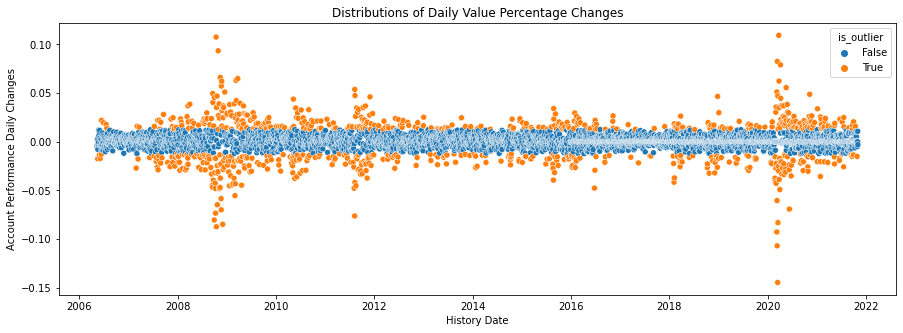

In [ ]:
#Check each model
#EDA for first model
import seaborn as sns
fig = plt.figure(figsize = (15,5))
ax = sns.scatterplot(x='HistoryDate', y = "MonthlyValue", hue = "is_outlier",data=m1)
ax.set(title='Distributions of Daily Value Percentage Changes')
ax.set_xlabel("History Date", fontsize = 10)
ax.set_ylabel("Account Performance Daily Changes", fontsize = 10)

Text(0, 0.5, 'Account Performance - Benchmar Daily Changes')

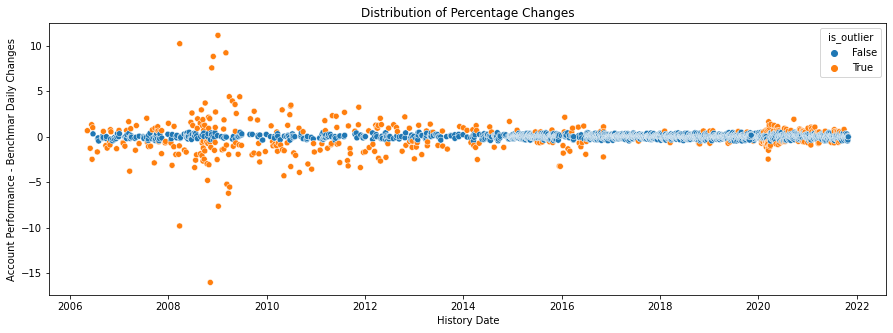

In [ ]:
#Check each model
#EDA for Second model
import seaborn as sns
fig = plt.figure(figsize = (15,5))
p = sns.scatterplot(x='HistoryDate', y = "difference", hue = "is_outlier",data=m2)
p.set(title='Distribution of Percentage Changes')
p.set_xlabel("History Date", fontsize = 10)
p.set_ylabel("Account Performance - Benchmar Daily Changes", fontsize = 10)

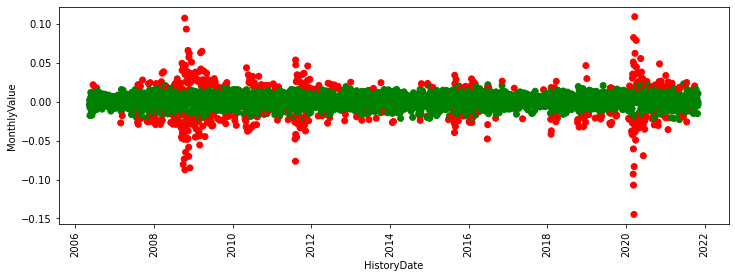

In [ ]:
#Check each model
#EDA for third model
plot_anomalies(m3,'HistoryDate','MonthlyValue')

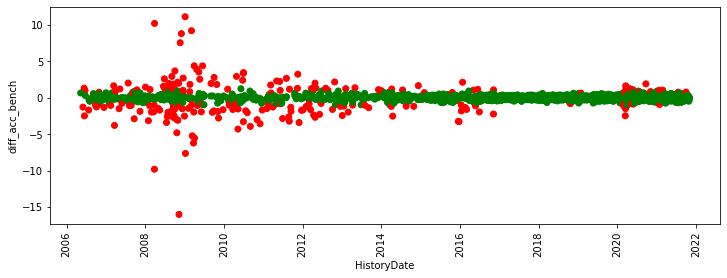

In [ ]:
#4TH
plot_anomalies(m4,'HistoryDate','diff_acc_bench')

# Model Outputs

In [ ]:
final_output = a.model_combined(int(acc),8,2,float(zsco))

C:\Users\Aash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
C:\Users\Aash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
<ipython-input-200-ad7bda8c4c37>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["model1_modified_zscore"][i] = int(final["model1_modified_zscore"][i])
<ipython-input-200-ad7bda8c4c37>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["model2_modified_zscore_diff"][i] =

In [ ]:
final_output

,date,model1_modified_zscore,model2_modified_zscore_diff,KNN,KNN_diff,final_sum
0,2006-05-12,0,0,0.0,0.0,0.0
1,2006-05-15,0,0,0.0,0.0,0.0
2,2006-05-16,0,0,0.0,0.0,0.0
3,2006-05-17,1,0,0.0,0.0,1.0
4,2006-05-18,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...
4733,2015-11-15,0,0,0.0,0.0,0.0
4734,2015-11-22,0,0,0.0,0.0,0.0
4735,2015-11-26,0,0,0.0,0.0,0.0
4736,2015-11-29,0,0,0.0,0.0,0.0


In [ ]:
final_output[final_output.final_sum >= int(vot)]

,date,model1_modified_zscore,model2_modified_zscore_diff,KNN,KNN_diff,final_sum
13,2006-06-01,0,1,0.0,1.0,2.0
20,2006-06-12,0,1,0.0,1.0,2.0
23,2006-06-15,1,1,1.0,1.0,4.0
26,2006-06-20,0,1,0.0,1.0,2.0
33,2006-06-29,1,0,1.0,0.0,2.0
...,...,...,...,...,...,...
4595,2006-10-29,0,1,0.0,1.0,2.0
4620,2008-09-14,0,1,0.0,1.0,2.0
4622,2008-09-28,0,1,0.0,1.0,2.0
4624,2008-11-09,0,1,0.0,1.0,2.0


In [ ]:
final_output.groupby("final_sum")['date'].count()

final_sum
0.0    3686
1.0     418
2.0     526
3.0      47
4.0      61
Name: date, dtype: int64

In [ ]:
final_output.sum()

model1_modified_zscore            810
model2_modified_zscore_diff       363
KNN                             460.0
KNN_diff                        222.0
final_sum                      1855.0
dtype: object

In [ ]:
final_output.to_csv("Final.csv", encoding='utf-8', index=False)

# Litmus Test

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
## Function to plot confusion matrix
def plot_conf(cf_matrix, name):
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',  fmt='g')

  ax.set_title('Confusion Matrix {}\n\n'.format(name));
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
## Making Copy of Data
litmus_account_perf = account_perf.copy()
litmus_benchmark_history = benchmark_history.copy()

In [ ]:
## Init Flag to 0
litmus_account_perf['litmus_flag'] = 0
litmus_benchmark_history['litmus_flag'] = 0

In [ ]:
## Selecting Random Index
acc_index_ten = litmus_account_perf.sample(200).index

In [ ]:
## Doubling some values, and multiplying some by 10
litmus_account_perf['MonthlyValue'][acc_index_ten] = litmus_account_perf['MonthlyValue'][acc_index_ten] * 10

litmus_account_perf['litmus_flag'][acc_index_ten] = 1

<ipython-input-218-5b4f5cede7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litmus_account_perf['MonthlyValue'][acc_index_ten] = litmus_account_perf['MonthlyValue'][acc_index_ten] * 10
<ipython-input-218-5b4f5cede7eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litmus_account_perf['litmus_flag'][acc_index_ten] = 1


In [ ]:
account_perf = litmus_account_perf.copy()

In [ ]:
#Call the model
b = models()

In [ ]:
first_model_litmus, m1_litmus = b.model_first(int(acc),8,float(zsco))
third_model_litmus, m3_litmus = b.model_third(int(acc),8,float(zsco))

C:\Users\Aash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


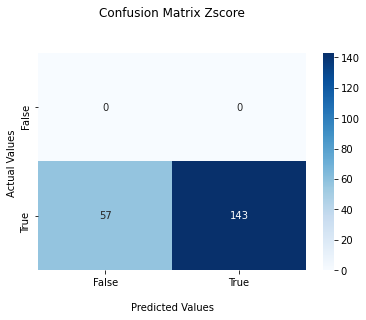

In [ ]:
## Calculting Confusion model for Zscore
first_model_litmus['model1_modified_zscore'] = first_model_litmus['model1_modified_zscore']*1
mod1_conf = confusion_matrix(litmus_account_perf['litmus_flag'][acc_index_ten], first_model_litmus['model1_modified_zscore'][acc_index_ten])
plot_conf(mod1_conf, 'Zscore')

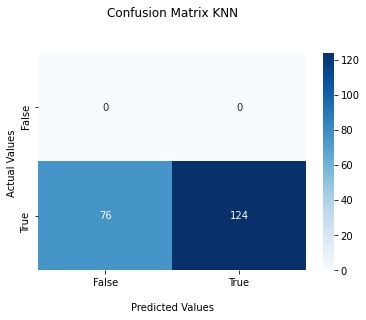

In [ ]:
## Calculting Confusion model for KNN
mod3_conf = confusion_matrix(litmus_account_perf['litmus_flag'][acc_index_ten], third_model_litmus['KNN'][acc_index_ten])
plot_conf(mod3_conf, 'KNN')